In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv",index_col=0)

In [ ]:
df

In [ ]:
df.describe()

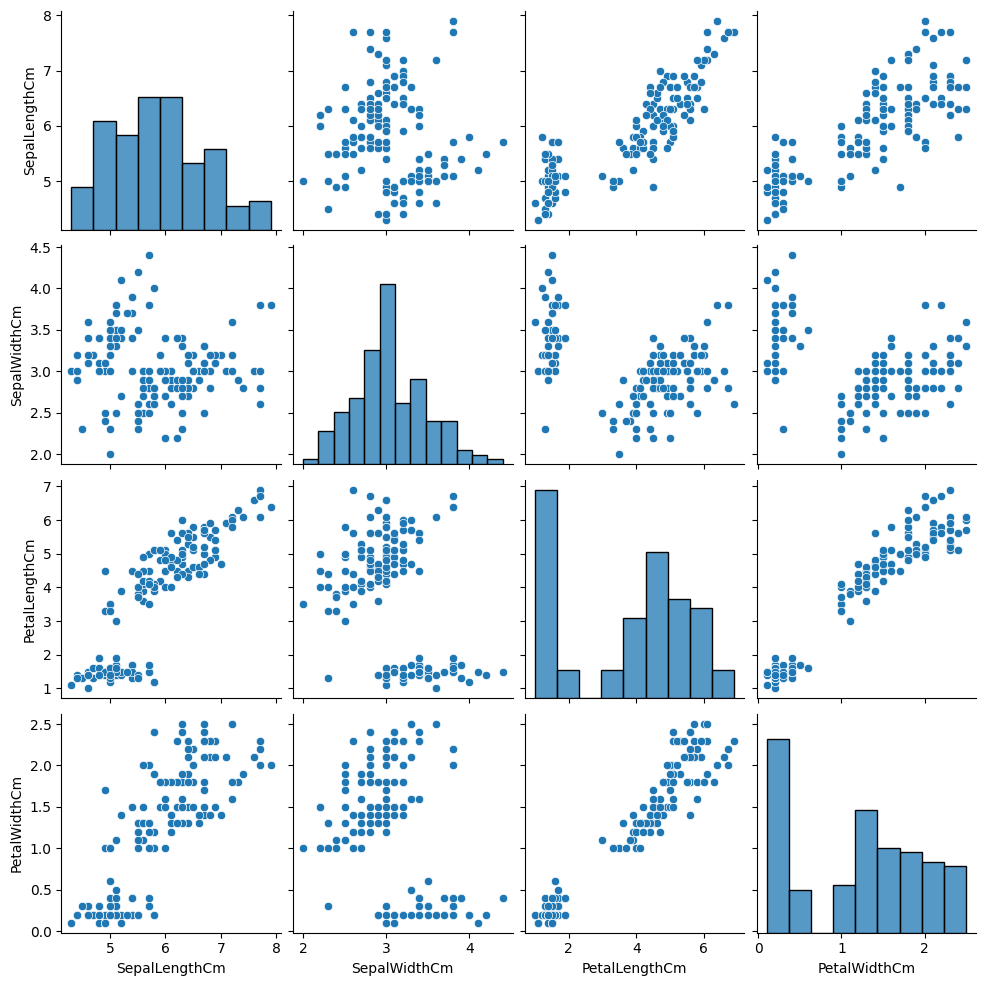

In [5]:
sns.pairplot(df) #just by looking at the graph we assume that there are only 2 classes

In [6]:
df['Species'].value_counts() # there are actually 3 classes. 2 classes might be overlapping

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
sns.pairplot(df,hue = 'Species') # now we can see 3 classes
# in 2D subspace they are overlapped. In 3D subspace it will not overlap.

In [ ]:
df.head()

In [10]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])

In [ ]:
df.head()

In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC() # use default values because data is in good format

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.iloc[:,:-1]
y = df['Species']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [18]:
svc.fit(x_train,y_train)

SVC()

In [19]:
ypred = svc.predict(x_test)

In [20]:
ypred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [23]:
print(svc.score(x_train,y_train),svc.score(x_test,y_test))

0.9642857142857143 0.9736842105263158


# **Hyperparameter Tuning**

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
params = {
    'C' : [0.1,0.001,1,2,3,4,5],
    'kernel' : ['linear','poly','rbf'],
    'gamma' : [0.1,0.001,1,2,5]
} # Check Documentation for C, kernel and gamma values: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [26]:
grid = GridSearchCV(SVC(),param_grid=params,verbose=1) # try verbose = 0


In [ ]:
grid.fit(x_train,y_train)

In [ ]:
x_train

In [28]:
# check optimal value of c gamma and kernel
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [29]:
svc = SVC(C=0.1,gamma=0.1,kernel='poly')

In [30]:
svc.fit(x_train,y_train)
ypred = svc.predict(x_test)

In [31]:
print('Training Accuracy',svc.score(x_train,y_train))
print('Testing Accuracy',svc.score(x_test,y_test))

Training Accuracy 0.9821428571428571
Testing Accuracy 0.9736842105263158


In [32]:
dict = {'SepalLengthCm': [5.1,4.7,4.7,6.7,6.3,6.5], 'SepalWidthCm': [3.5,3.0,3.2,3.0,2.5,3.0], 'PetalLengthCm': [1.4,1.4,1.3,5.2,5.0,5.2], 'PetalWidthCm':[0.2,0.2,0.2,2.3,1.9,2.0]}

In [33]:
newdata = pd.DataFrame(dict)

In [34]:
svc.predict(newdata)

array([0, 0, 0, 2, 2, 2])